### **本节介绍学习优化的其他技巧**

**一，权值的初始化**，即权值矩阵的初始化

当激活函数使用**ReLU**时，权重初始值使用**He初始值**；  
当激活函数为**sigmoid或tanh等S型曲线函数**时，初始值使用**Xavier初始值**。  
这是**目前的最佳实践**  

***

**二，Batch Normalization（批量归一化）**

以下简称**Batch Norm**

Batch Norm的**优点**：

• 可以使学习快速进行（可以增大学习率）。  
• 不那么依赖初始值（对于初始值不用那么神经质）。  
• 抑制过拟合（降低Dropout等的必要性）。  

**什么是Batch Borm?**

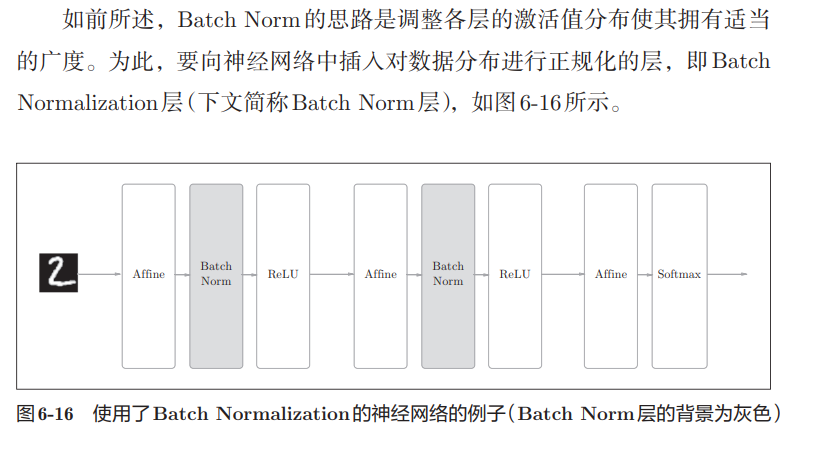

Batch Norm，顾名思义，以进行学习时的mini-batch为单位，按mini-batch进行正规化。  
具体而言，**就是进行使数据分布的均值为0、方差为1的正规化**。  
用数学式表示的话，如下所示:

$$ \mu_b = \frac{1}{m} \sum_{i = 1}^m x_i $$
$$ \sigma_b = \frac{1}{m} \sum_{i = 1}^m (x_i - \mu_b)^2$$
$$ \hat x_i = \frac{x_i - \mu_b}{\sqrt{\sigma_b^2 + \varepsilon}}$$

**其中 $ \mu_b $ 为均值，$ \sigma_b $为方差，$ \varepsilon $ 是一个微小值，防止除0错误**

接着，Batch Norm层会对正规化后的数据进行缩放和平移的变换，用数学式可以如下表示：
$$ y_i \leftarrow \gamma \hat x_i + \beta $$

**其中 $ \gamma $ 与 $ \beta $ 属于学习参数，可以在学习过程中更新**

最后附上mini-batch的计算图（非常复杂，反向传播也难）

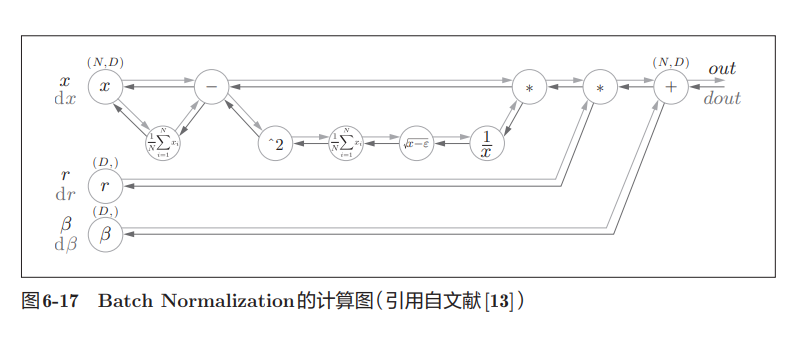

***

**三，抑制过拟合现象**

**法一：权值衰减**

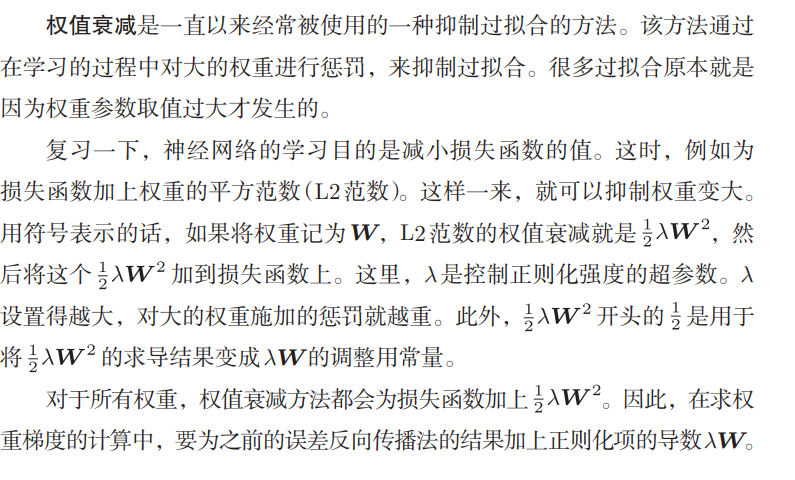

**法二（常用）：dropout（随机删除神经元）**

dropout 删除神经元的操作可以理解为**模拟集成神经网络的过程**，只是在一个网络上实现而已

下面用代码实现dropout类

In [1]:
# 导入包
import numpy as np

In [2]:
class Dropout:
    """Dropout类,用于抑制过拟合"""
    def __init__(self,dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio # 每次删除的比例
        self.mask = None

    def forward(self,x,train_flag = True):
        if train_flag:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self,dout):
        return dout * self.mask

**四，超参数的验证**

**基本步骤**：

**步骤0**：  
设定超参数的范围。 

**步骤1**：  
从设定的超参数范围中随机采样。

**步骤2**：  
使用步骤1中采样到的超参数的值进行学习，通过验证数据评估识别精度（但是要将epoch设置得很小）。

**步骤3**：  
重复步骤1和步骤2（100次等），根据它们的识别精度的结果，缩小超参数的范围

**注意**：  
反复进行上述操作，不断缩小超参数的范围，在缩小到一定程度时，从该范围中选出一个超参数的值。  
这就是进行超参数的最优化的一种方法，**但这只是一种实践性的方法**